Dataset : https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024/data

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv


In [2]:
df = pd.read_csv("/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.shape

(50000, 11)

In [5]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [6]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,50000.0,2017.01570,4.324459,2010.0,2013.00,2017.0,2021.00,2024.0
Engine_Size_L,50000.0,3.24718,1.009078,1.5,2.40,3.2,4.10,5.0
Mileage_KM,50000.0,100307.20314,57941.509344,3.0,50178.00,100388.5,150630.25,199996.0
Price_USD,50000.0,75034.60090,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,5067.51468,2856.767125,100.0,2588.00,5087.0,7537.25,9999.0


In [11]:
df.describe(include="object").T

,count,unique,top,freq
Model,50000,11,7 Series,4666
Region,50000,6,Asia,8454
Color,50000,6,Red,8463
Fuel_Type,50000,4,Hybrid,12716
Transmission,50000,2,Manual,25154
Sales_Classification,50000,2,Low,34754


In [13]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [33]:
df['Total price']=df['Price_USD']*df['Sales_Volume']
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total price
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748.0,98740.0,8300.0,High,819542000.0
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671.0,79219.0,3428.0,Low,271562732.0
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991.0,113265.0,6994.0,Low,792175410.0
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255.0,60971.0,4047.0,Low,246749637.0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131.0,49898.0,3080.0,Low,153685840.0


In [34]:
values = ['Price_USD', 'Sales_Volume','Total price']

for i in values:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

    if outliers.empty:
        print(f'✅ No outliers found in {i}')
    else:
        print(f'⚠️ Found {len(outliers)} outliers in {i}')
        print(outliers[i].head())

✅ No outliers found in Price_USD
✅ No outliers found in Sales_Volume
⚠️ Found 167 outliers in Total price
154    1.154362e+09
238    1.124709e+09
277    1.151741e+09
726    1.133161e+09
938    1.155274e+09
Name: Total price, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


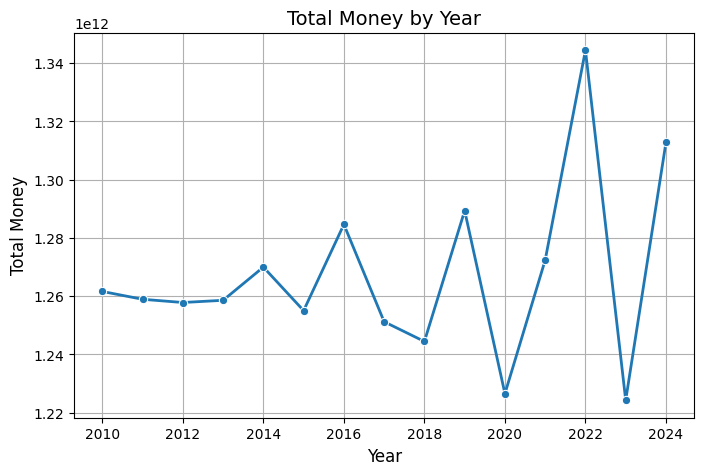

In [36]:
grouped = df.groupby('Year')['Total price'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=grouped, x='Year', y='Total price', marker='o', linewidth=2)

plt.title('Total Money by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Money', fontsize=12)
plt.grid(True)
plt.show()

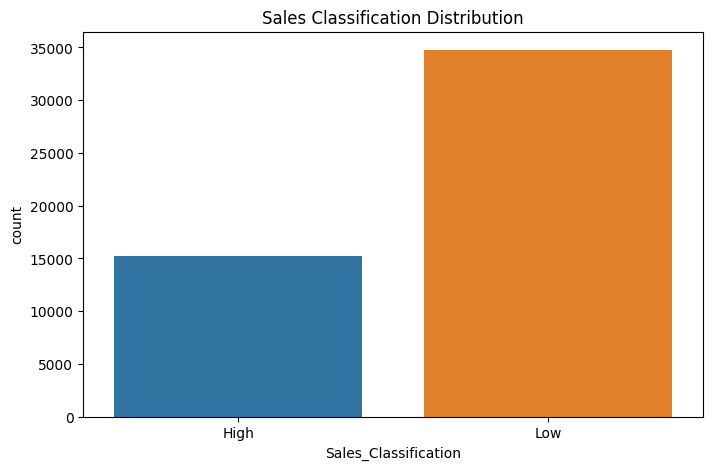

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sales_Classification', data=df)
plt.title('Sales Classification Distribution')
plt.show()

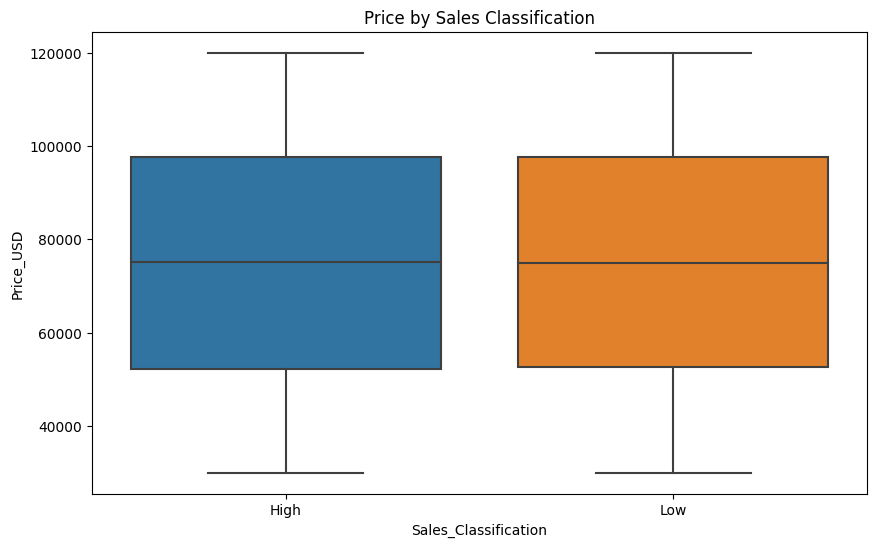

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df)
plt.title('Price by Sales Classification')
plt.show()

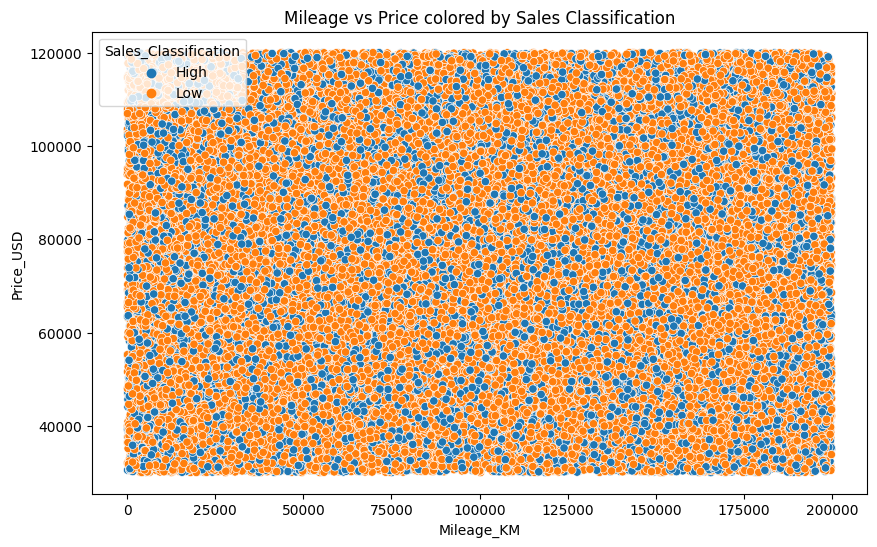

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage_KM', y='Price_USD', hue='Sales_Classification', data=df)
plt.title('Mileage vs Price colored by Sales Classification')
plt.show()

<Axes: ylabel='count'>

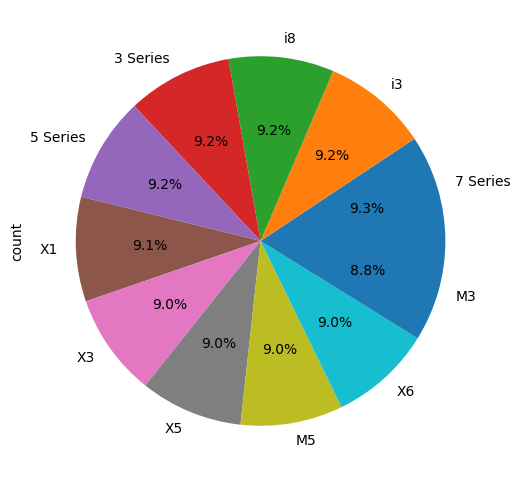

In [21]:
plt.figure(figsize=(10,6))
df['Model'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='Density'>

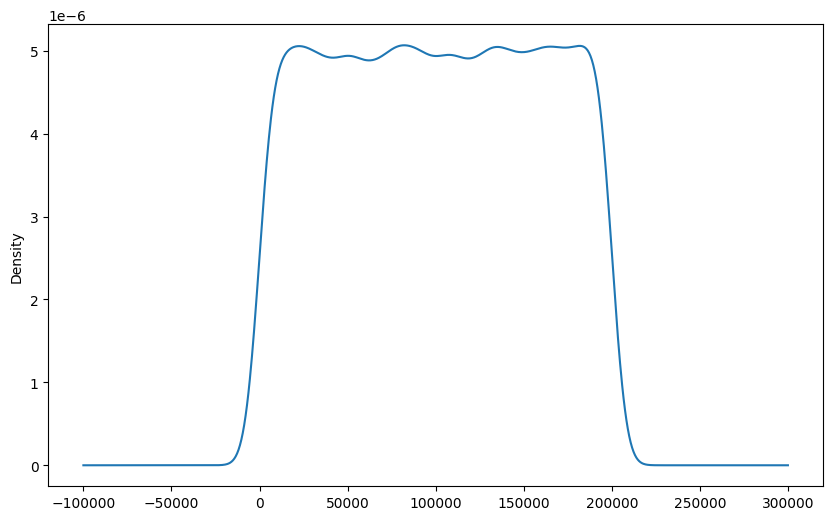

In [22]:
plt.figure(figsize=(10,6))
df['Mileage_KM'].plot(kind='kde')

<Axes: >

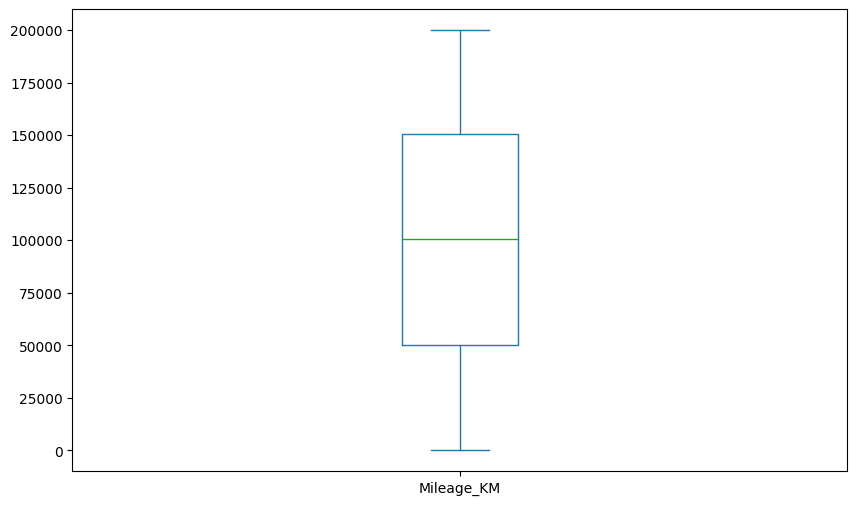

In [23]:
plt.figure(figsize=(10,6))
df['Mileage_KM'].plot(kind='box')

In [24]:
df[df['Mileage_KM'] < 100]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
5291,i3,2010,Africa,White,Petrol,Manual,2.8,3.0,93933.0,5336.0,Low
6621,i3,2020,Africa,Grey,Electric,Automatic,1.8,48.0,39983.0,5511.0,Low
7023,X3,2012,Middle East,White,Diesel,Manual,2.6,58.0,39244.0,9531.0,High
7780,5 Series,2018,South America,Blue,Petrol,Automatic,4.5,21.0,55195.0,9860.0,High
8728,5 Series,2024,Europe,Silver,Diesel,Automatic,3.7,90.0,66518.0,5675.0,Low
12216,5 Series,2018,Asia,Black,Hybrid,Automatic,3.6,83.0,30514.0,8176.0,High
14312,X1,2022,North America,Grey,Diesel,Automatic,1.9,43.0,103557.0,5390.0,Low
14696,X6,2013,Africa,Silver,Petrol,Automatic,1.5,55.0,102652.0,5657.0,Low
15587,X1,2019,Asia,Blue,Petrol,Automatic,3.7,62.0,69136.0,4536.0,Low
15971,7 Series,2014,South America,Grey,Electric,Manual,4.6,63.0,91779.0,1345.0,Low


<Axes: ylabel='Frequency'>

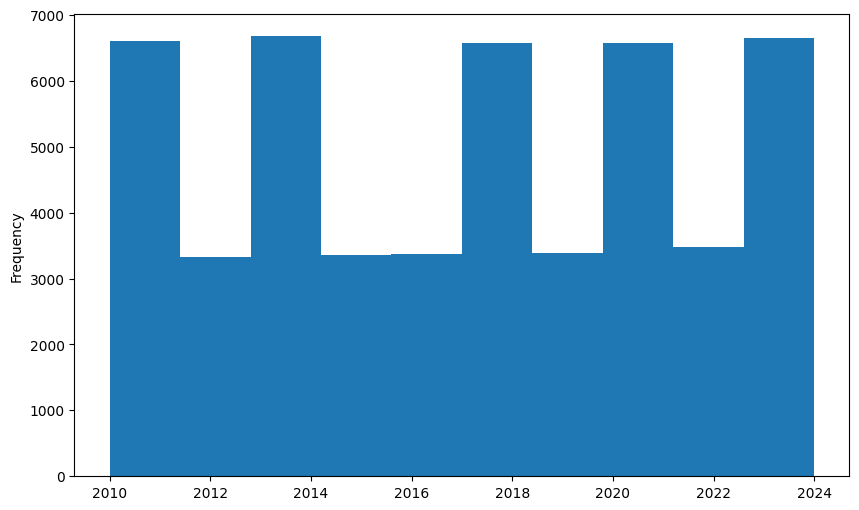

In [25]:
plt.figure(figsize=(10,6))
df['Year'].plot(kind='hist')

<Axes: title={'center': 'Color Distribution'}, ylabel='count'>

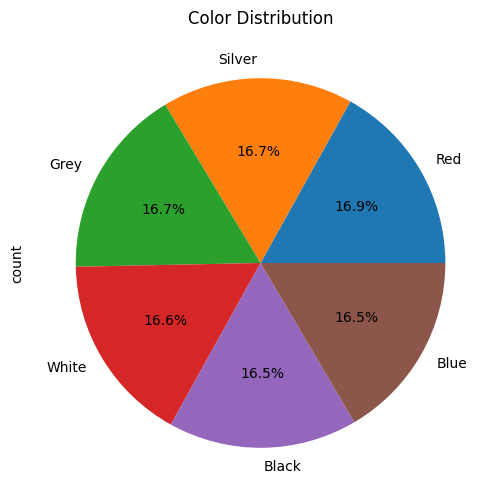

In [26]:
plt.figure(figsize=(10,6))
df['Color'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Color Distribution')

<Axes: title={'center': 'Fuel Distribution'}, ylabel='count'>

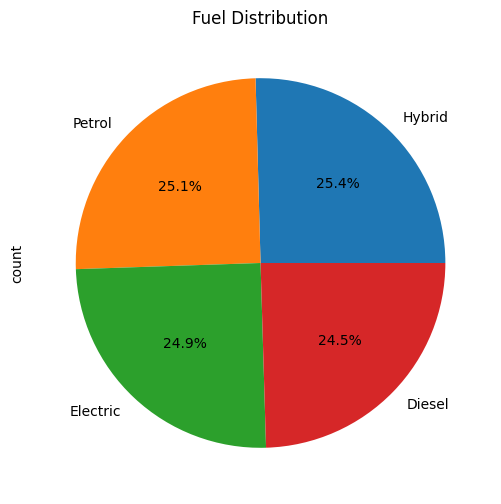

In [27]:
plt.figure(figsize=(10,6))
df['Fuel_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6,6), title='Fuel Distribution')

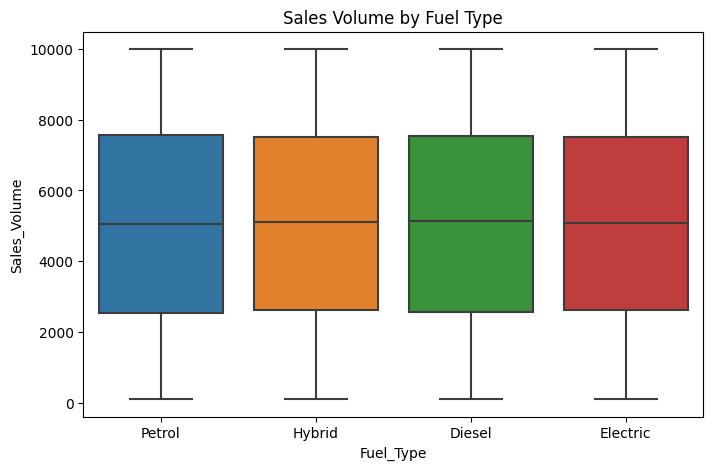

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Fuel_Type', y='Sales_Volume')
plt.title('Sales Volume by Fuel Type')
plt.show()

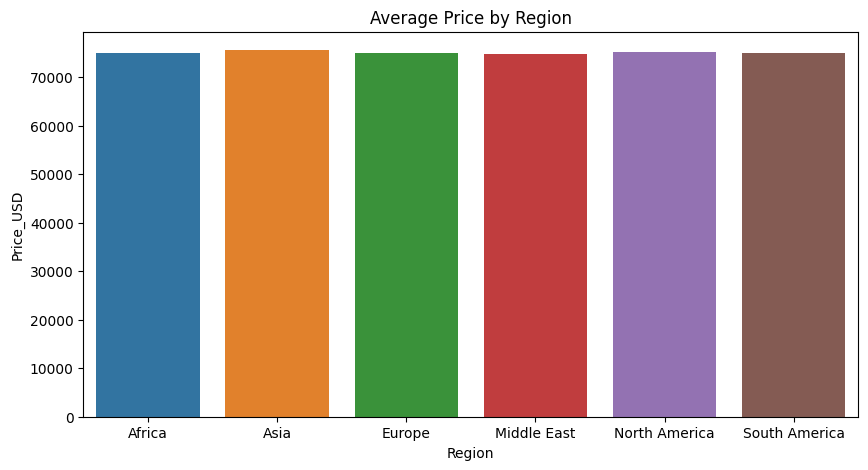

In [45]:
region_price = df.groupby('Region')['Price_USD'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=region_price, x='Region', y='Price_USD')
plt.title('Average Price by Region')
plt.show()

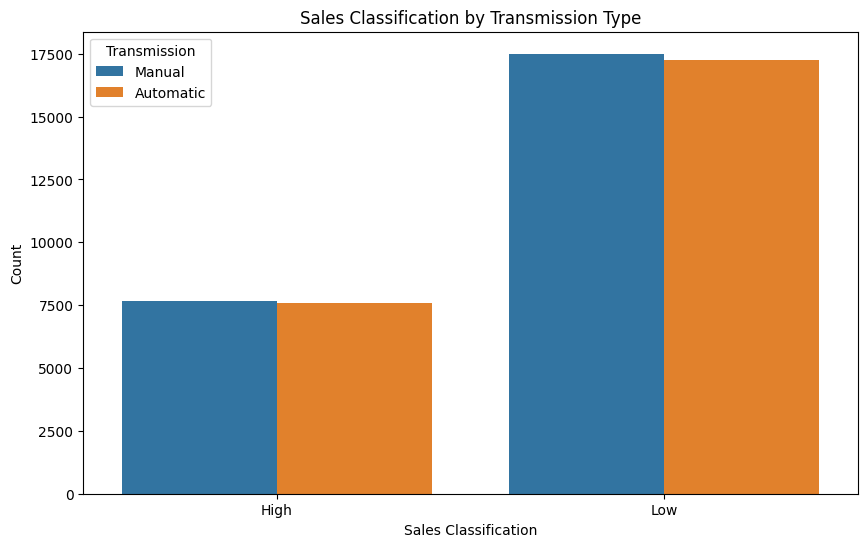

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sales_Classification', hue='Transmission')
plt.title('Sales Classification by Transmission Type')
plt.xlabel('Sales Classification')
plt.ylabel('Count')
plt.show()

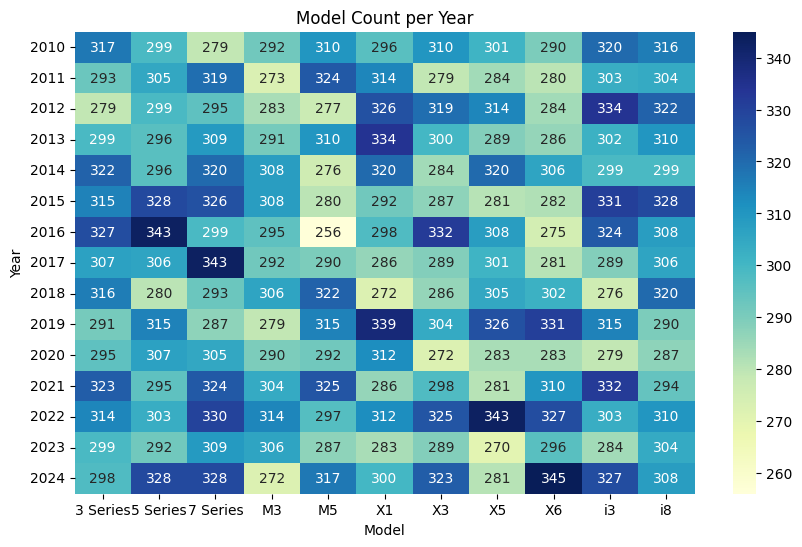

In [29]:
#Conclusion from Model-Year Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.groupby(['Year','Model']).size().unstack(), cmap='YlGnBu', annot=True, fmt='d'); plt.title('Model Count per Year'); plt.show()

<Figure size 1000x600 with 0 Axes>

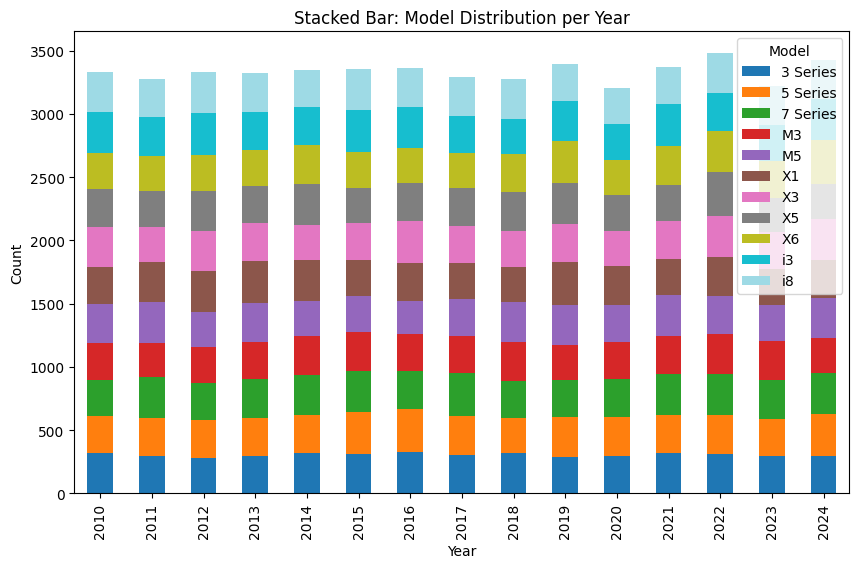

In [30]:
#Conclusion from Model-Year Analysis
plt.figure(figsize=(10,6))
df.groupby(['Year','Model']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20'); plt.title('Stacked Bar: Model Distribution per Year'); plt.ylabel('Count'); plt.show()

<Figure size 1000x600 with 0 Axes>

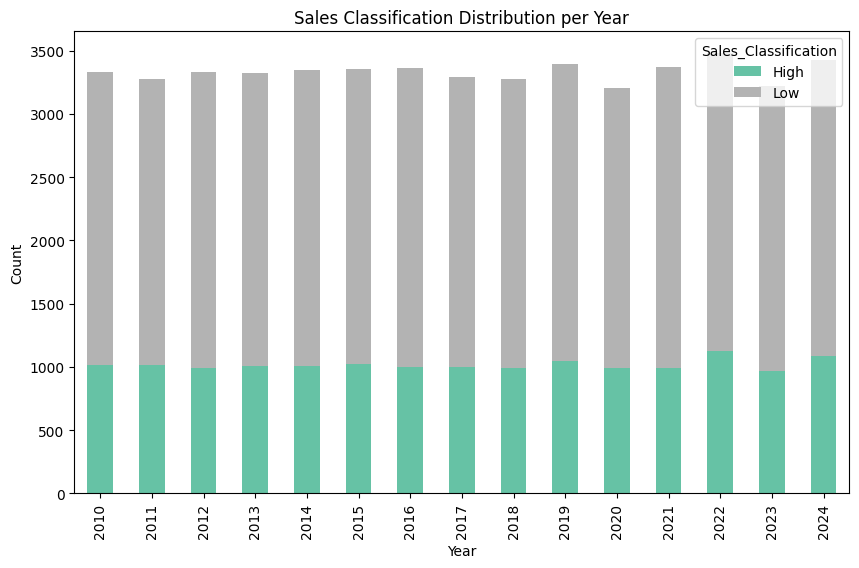

In [37]:
#Conclusion from Sales_Classification-Year Analysis
plt.figure(figsize=(10,6))
df.groupby(['Year','Sales_Classification']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='Set2'
)
plt.title('Sales Classification Distribution per Year')
plt.ylabel('Count')
plt.show()

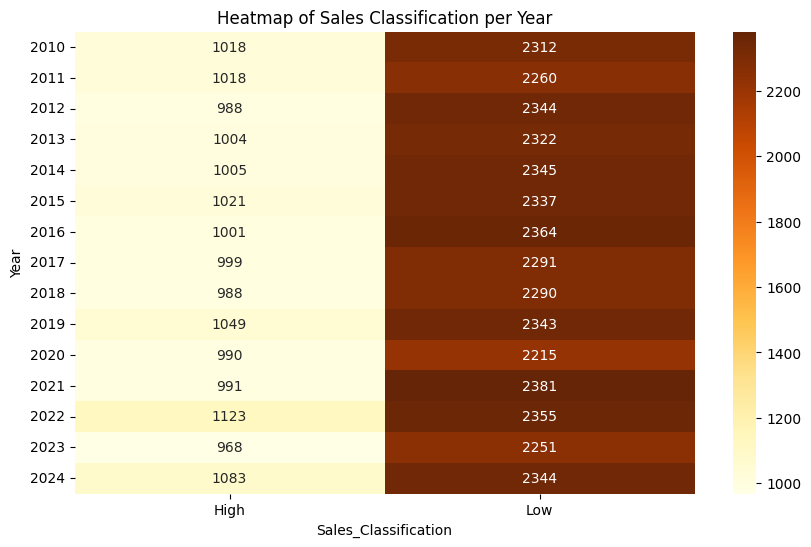

In [38]:
#Conclusion from Sales_Classification-Year Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.groupby(['Year','Sales_Classification']).size().unstack(), 
            annot=True, fmt='d', cmap='YlOrBr')
plt.title('Heatmap of Sales Classification per Year')
plt.show()

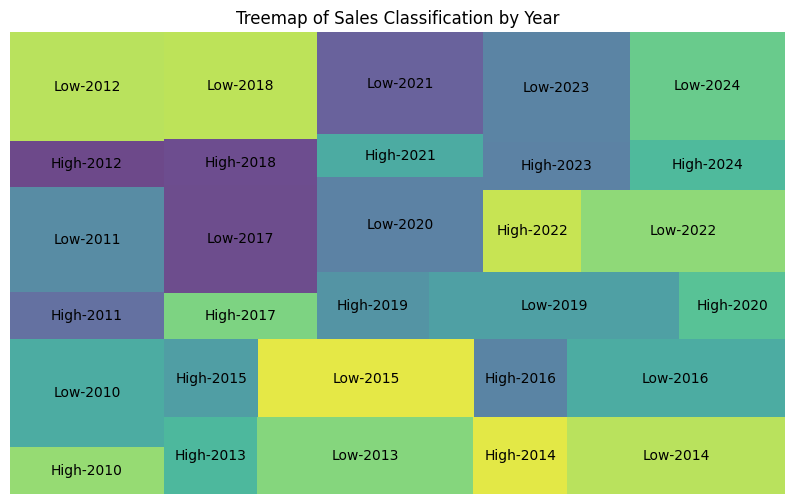

In [39]:
import squarify
plt.figure(figsize=(10,6))
counts = df.groupby(['Year','Sales_Classification']).size().reset_index(name='count')
squarify.plot(sizes=counts['count'], label=counts['Sales_Classification']+'-'+counts['Year'].astype(str), alpha=.8)
plt.axis('off')
plt.title('Treemap of Sales Classification by Year')
plt.show()

<Figure size 1000x600 with 0 Axes>

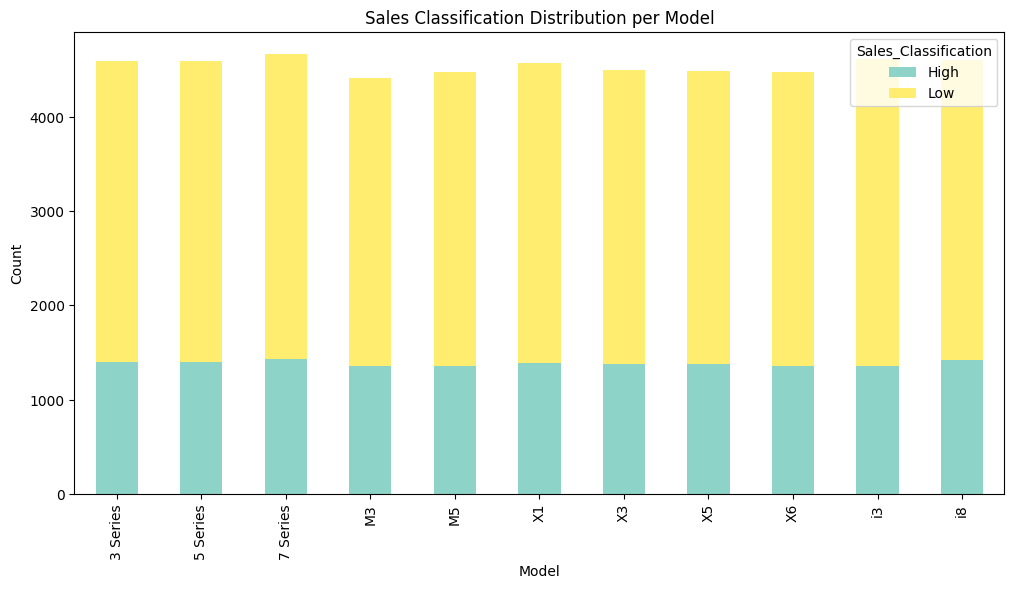

In [41]:
#Conclusion from Model-Sales_Classification Analysis
plt.figure(figsize=(10,6))
df.groupby(['Model','Sales_Classification']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='Set3'
)
plt.title('Sales Classification Distribution per Model')
plt.ylabel('Count')
plt.show()

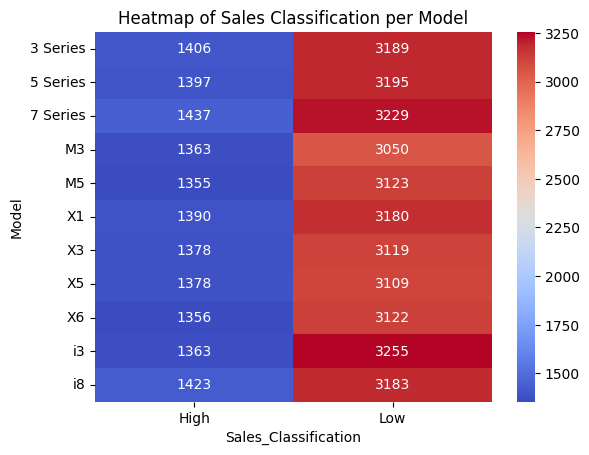

In [42]:
sns.heatmap(df.groupby(['Model','Sales_Classification']).size().unstack(), 
            annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Sales Classification per Model')
plt.show()

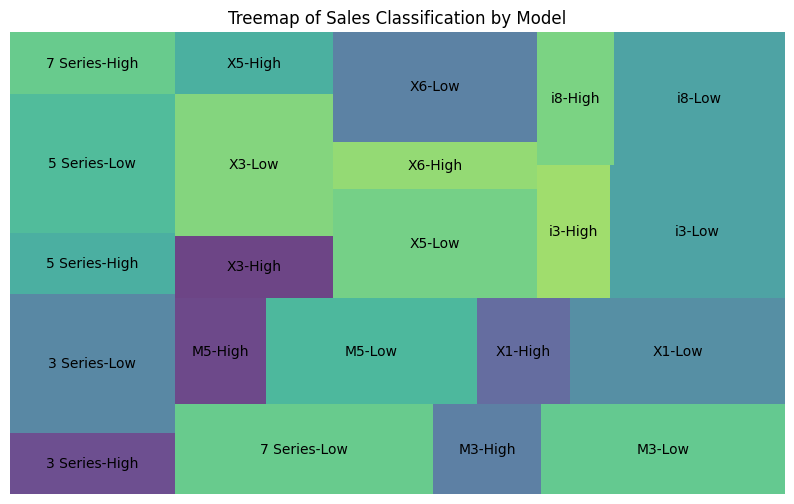

In [43]:
plt.figure(figsize=(10,6))
counts = df.groupby(['Model','Sales_Classification']).size().reset_index(name='count')
squarify.plot(sizes=counts['count'], label=counts['Model']+'-'+counts['Sales_Classification'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Sales Classification by Model')
plt.show()